https://stackoverflow.com/questions/73835742/finding-the-ideal-ttl-using-a-histogram

In [1]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

In [2]:
np.random.seed(123)

In [3]:
X = stats.exponweib(a=3.05, c=0.95)

In [4]:
xcut = X.ppf(0.95)  # 4.408962640288286

In [5]:
X.cdf(xcut)

0.95

In [6]:
xlin = np.linspace(0, 10, 200)
xclin = np.linspace(0, xcut, 200)

/usr/local/lib/python3.6/dist-packages/scipy/stats/_continuous_distns.py:1678: RuntimeWarning: invalid value encountered in add
  negxc + sc.xlogy(c - 1.0, x))
/usr/local/lib/python3.6/dist-packages/scipy/stats/_continuous_distns.py:1678: RuntimeWarning: invalid value encountered in add
  negxc + sc.xlogy(c - 1.0, x))


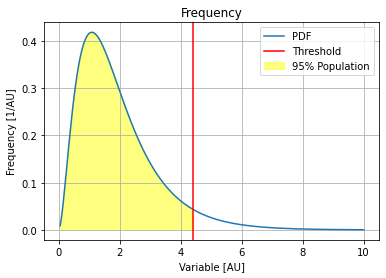

In [7]:
fig, axe = plt.subplots()
#axe.hist(x, bins=100, density=1.0, alpha=0.4, label="Dataset")
axe.plot(xlin, X.pdf(xlin), label="PDF")
axe.axvline(xcut, color="red", label="Threshold")
axe.fill_between(xclin, 0, X.pdf(xclin), color="yellow", alpha=0.5, label="95% Population")
axe.set_title("Frequency")
axe.set_xlabel("Variable [AU]")
axe.set_ylabel("Frequency [1/AU]")
axe.legend()
axe.grid()

In [8]:
X = stats.exponweib(a=3.05, c=0.95, loc=10, scale=2)
x = X.rvs(size=10000).round()
bins = np.arange(x.min(), x.max()+1)
hist = np.histogram(x, bins=bins)

In [9]:
hist[0]

array([ 128, 1368, 2045, 1840, 1507, 1089,  738,  437,  286,  197,  142,
         77,   63,   36,   19,    8,    5,    2,    8,    3,    1,    0,
          1])

In [10]:
hist[1]

array([10., 11., 12., 13., 14., 15., 16., 17., 18., 19., 20., 21., 22.,
       23., 24., 25., 26., 27., 28., 29., 30., 31., 32., 33.])

In [11]:
dist = stats.rv_histogram(hist)
xcut = dist.ppf(0.95)            # 19.132978723404246
xcut

19.31472081218274

In [12]:
dist.cdf(19)  # 0.9475000000000001
dist.cdf(20)  # 0.9663000000000002

0.9635

In [13]:
xcut

19.31472081218274

In [16]:
xlin = np.linspace(x.min(), x.max(), 200)
xclin = np.linspace(x.min(), xcut, 200)

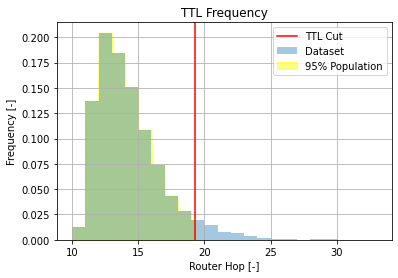

In [17]:
fig, axe = plt.subplots()
axe.hist(x, bins=bins, density=1.0, alpha=0.4, label="Dataset")
axe.axvline(xcut, color="red", label="TTL Cut")
axe.fill_between(xclin, 0, dist.pdf(xclin), color="yellow", alpha=0.5, label="95% Population")
axe.set_title("TTL Frequency")
axe.set_xlabel("Router Hop [-]")
axe.set_ylabel("Frequency [-]")
axe.legend()
axe.grid()